# A. Introduction

Dataset Rain Australia merupakan dataset yang berisi tentang Kumpulan data tentang pengamatan cuaca harian selama sekitar 10 tahun dari banyak lokasi di seluruh Australia. Dataset ini bisa di akses melalui situs Kaggle (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)

RainTomorrow adalah variabel target untuk diprediksi. Artinya apakah keesokan harinya turun hujan, Ya atau Tidak

Dataset Rain in Australia mempunyai 23 kolom yaitu

* Identification Variabel
  1. Date
  2. Location

* Temperature Variabel
  1. MinTemp
  2. MaxTemp
  3. Temp9am
  4. Temp3pm

* Atmoshperic Variabel
  1. Pressure9am
  2. Pressure3pm
  3. Sunshine
  4. Cloud9am
  5. Cloud3pm

* Moisture Variabel
  1. Humidity9am
  2. Humidity3pm
  3. Evaporation
  4. Rainfall
  5. RainToday

* Wind Variabel
  1. WindGustDir
  2. WindGustSpeed
  3. WindDir9am
  4. WindSpeed9am
  5. WindDir3pm
  6. WindSpeed3pm

* Target Variabel







# B.Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# C. Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

# D. Data Cleaning

## Explorasi Sederhana Dataset

In [ ]:
# Melihat shape dataset
df.shape

(145460, 23)

In [ ]:
# melihat kolom
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# melihat info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# melihat describe kolom numerik dataset
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

Sedikit kesimpulan yang bisa diambil mungkin adalah setiap kolom numerik memiliki mean yang tidak rata dan juga std yang tidak tersebar rata di beberapa kolom. Mungkin juga jika ingin dijadikan features perlu adanya standarisasi pada koom tertentu  

In [ ]:
# Melihat describe kolom kategorikal
df.describe(include = ['O'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

Bisa diambil bebrapa kesimpulan dari deskripsi data kategorikal diatas seperti jumlah  dari beberapa kolom tidak sesuai dengan rows yang ada, ada kemungkinan terdapat missing values. Lalu untuk kolom date mungkin lebih baik di drop karena unique values nya terlalu banyak untuk dijadikan features. Selain itu juga di locationada 49 unique values, perlu dianalisa lagi apakah lebih baik di drop atau bisa di pakai. Dan untuk RainTomorrow Terlihat bahwa freq No memiliki values 110316 dari 145460 rows yang ada di dataset. Ada kemungkinan target kita ini tidak seimbang antara No dan Yes

## Menangani Missing Values

In [ ]:
# Cek data yang duplikat di dataframe
print(f'number of duplicated data: {len(df[df.duplicated()])}')
df[df.duplicated()]

number of duplicated data: 0


Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]

In [ ]:
# melihat missing values disetiap kolom
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Di dataset ini  hampir disetiap kolom ada missing values

In [ ]:
# melihat berapa persen missing values pada setiap kolom
miss_val = (df.isnull().sum()/len(df))*100
miss_val

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

### Drop Kolom Missing values Categorical dan Numerical data


In [ ]:
miss_val

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

dilihat dari persenan diatas ada beberapa kolom yang memiliki missing values besar seperti kolom (sunshine,evaporation,Cloud9am,Cloud3pm)
mungkin lebih baik kita drop saja

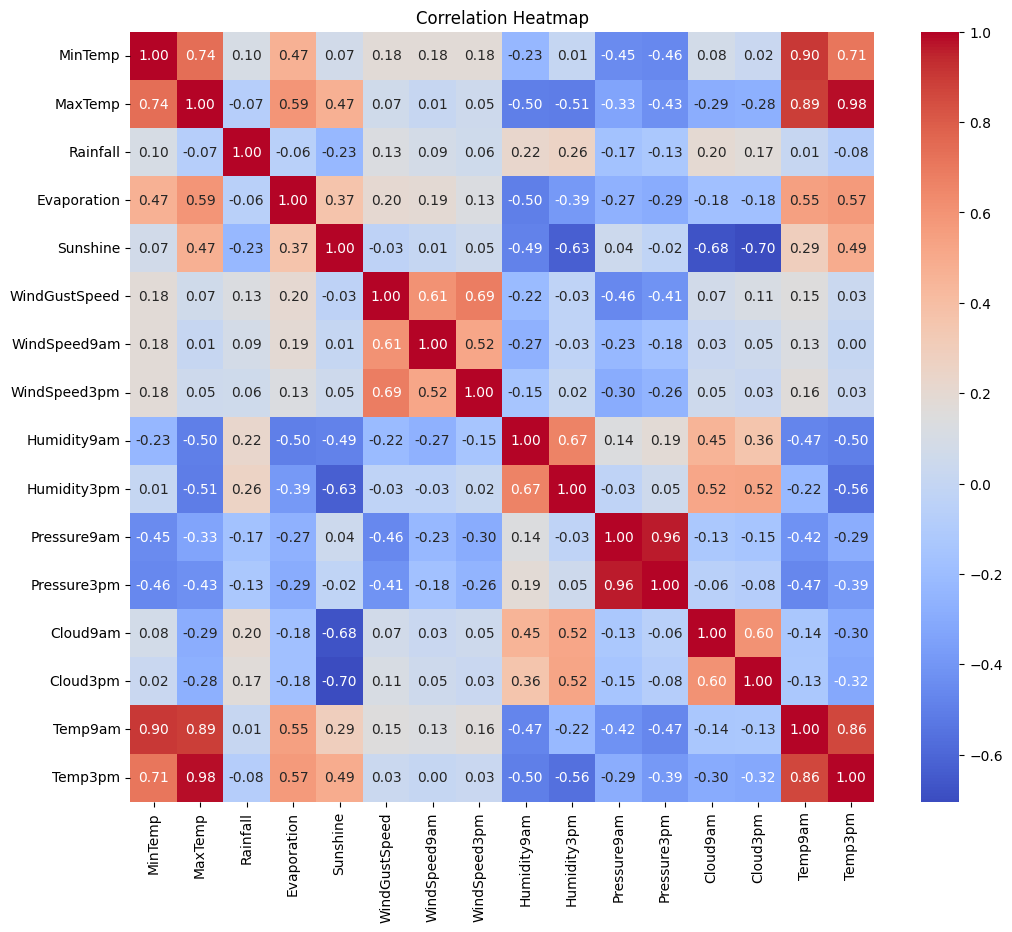

In [ ]:
correlation_matrix=df.corr()
# Menggunakan heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Temp3pm memiliki korelasi yang sangat tinggi dengan MaxTemp dan memiliki lebih banyak nilai null daripada MaxTemp sehingga kami menghapus kolom tersebut.

Demikian pula Pressure9am juga memiliki korelasi yang sangat tinggi dengan Pressure3pm jadi kami juga menghapus kolom itu.

Kolom date tidak memiliki ketergantungan dan hubungan apa pun dengan kolom keluaran jadi kami juga menghapusnya

In [ ]:
df_dropcols = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Temp3pm","Pressure9am",],axis=1)
df_dropcols.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure3pm  Temp9am RainToday RainTomorrow  
0       1007.1     16.9        No           No  
1       1007.8     17.2        No           No  
2       1008.7     21.0        No           No  
3       1012.8     18.1        No           No  
4       1006.0     17.8        No           No

In [ ]:
df_dropcols.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Setelah drop kolom selanjutnya kita pisahkan kolom numerik dan kolom categorical untuk membedakan imputasi yang akan dilakukan

In [ ]:
numcols = df_dropcols.select_dtypes(include=['int', 'float'])
catcols = df_dropcols.select_dtypes(include=['object'])

In [ ]:
catcols.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Setelah itu mari melihat distribusi data numerik untuk menentukan imputasi menggunakan apa

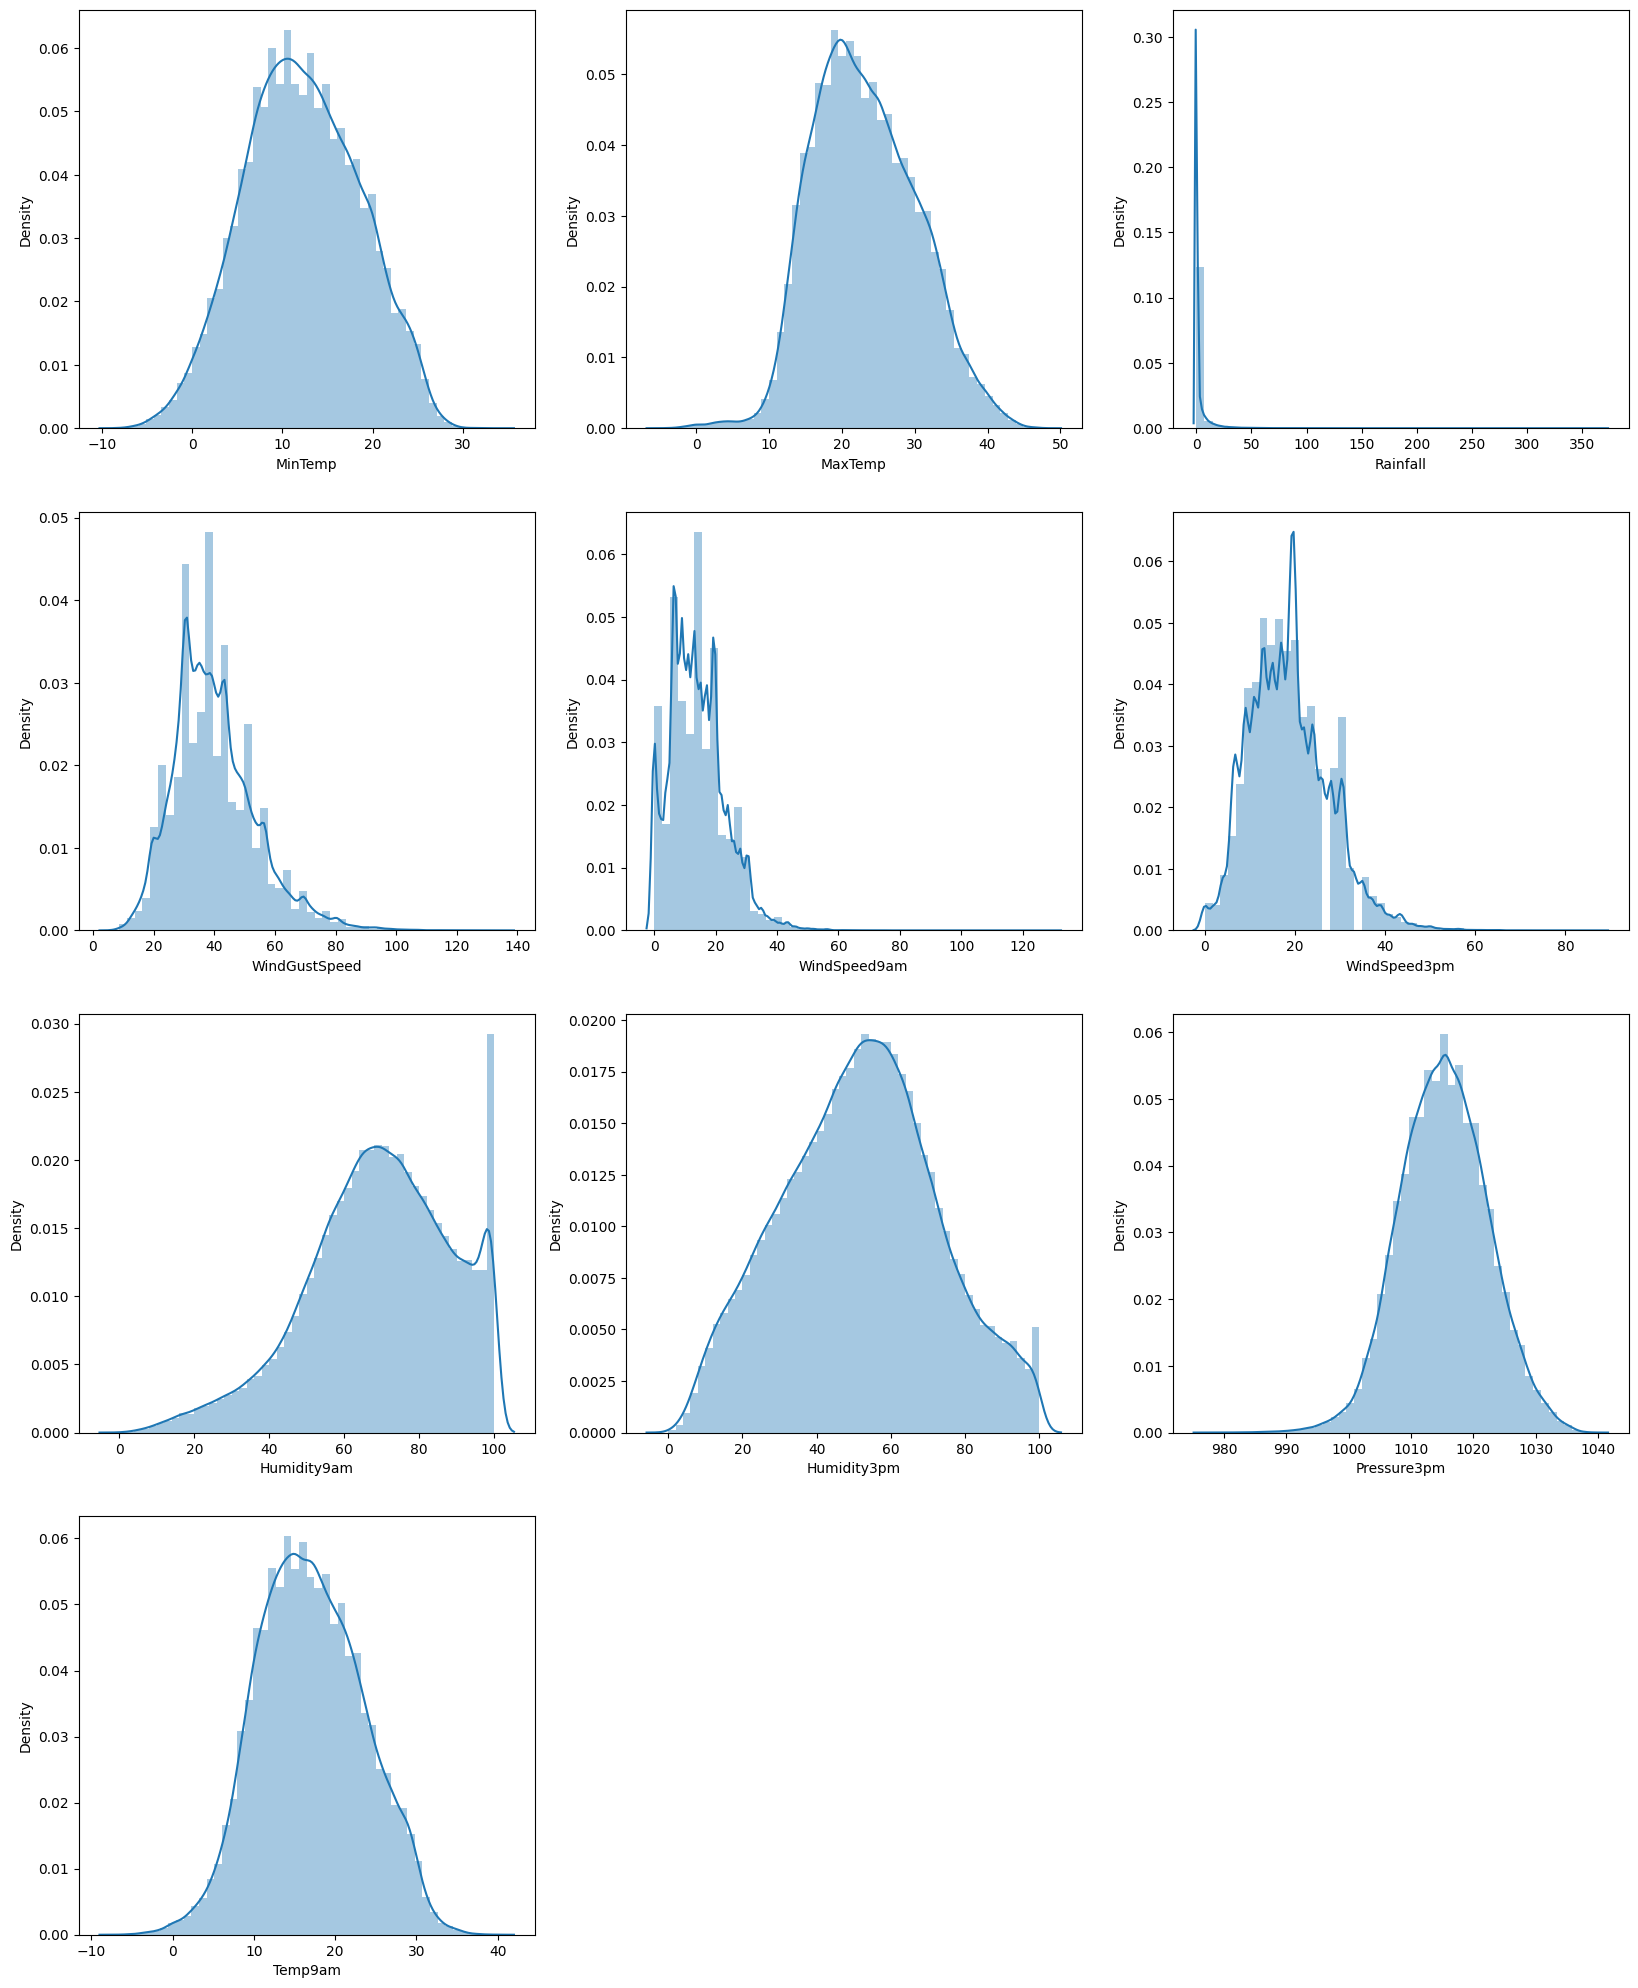

In [ ]:
columns = numcols.columns
plt.figure(figsize=(20,25))
plotnum = 1
for col in columns:
    if plotnum<11:
        plt.subplot(4,3,plotnum)
        sns.distplot(x=df[col],kde=True)
        plt.xlabel(col)
    plotnum+=1
plt.show()

Dari plot distribusi diatas di kolom (Mintemp,MaxTemp,Humidity9am,Humidity3pm,Pressure3pm,Temp9am) memiliki distribusi normal jadi kita gunakan mean untuk imputasi

Untuk kolom(WindGustSpeed,WindSpeed9am,WindSpeed3pm) saya akan menggunakan median karena terlihat pada distribusi lebih condong ke kiri atau skewnes.

In [ ]:
df_dropcols["Pressure3pm"] = df_dropcols["Pressure3pm"].fillna(df_dropcols["Pressure3pm"].mean())
df_dropcols["Temp9am"] = df_dropcols["Temp9am"].fillna(df_dropcols["Temp9am"].mean())
df_dropcols["MinTemp"] = df_dropcols["MinTemp"].fillna(df_dropcols["MinTemp"].mean())
df_dropcols["MaxTemp"] = df_dropcols["MaxTemp"].fillna(df_dropcols["MaxTemp"].mean())
df_dropcols["Humidity9am"] = df_dropcols["Humidity9am"].fillna(df_dropcols["Humidity9am"].mean())
df_dropcols["Humidity3pm"] = df_dropcols["Humidity3pm"].fillna(df_dropcols["Humidity3pm"].mean())
df_dropcols["WindGustSpeed"] = df_dropcols["WindGustSpeed"].fillna(df_dropcols["WindGustSpeed"].median())
df_dropcols["WindSpeed9am"] = df_dropcols["WindSpeed9am"].fillna(df_dropcols["WindSpeed9am"].median())
df_dropcols["WindSpeed3pm"] = df_dropcols["WindSpeed3pm"].fillna(df_dropcols["WindSpeed3pm"].median())


In [ ]:
# hapus missing values di kolom raintomorrow
df_dropcols = df_dropcols[df_dropcols["RainTomorrow"].notna()]


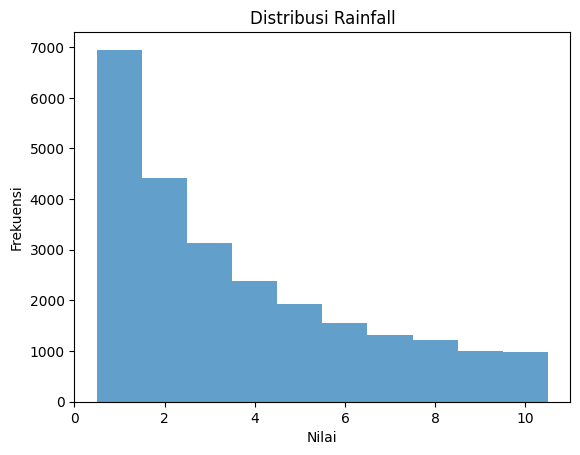

In [ ]:
# melihat ulang distribusi di kolom rainfall
plt.hist(df_dropcols['Rainfall'], bins=range(1, 12), align='left', alpha=0.7)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rainfall')
plt.show()

Dari plot diatas terlihat bahwa distribusi di kolom Rainfall right skewed jadi kita imputasi menggunakan median

In [ ]:
df_dropcols["Rainfall"] = df_dropcols["Rainfall"].fillna(df_dropcols["Rainfall"].median())

In [ ]:
# Cek missing values lagi
df_missval = df_dropcols.isnull().sum()
df_missval

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure3pm          0
Temp9am              0
RainToday         1406
RainTomorrow         0
dtype: int64

Untuk Cleaning data pada numerik kolom sudah selesai selanjutnya kita cleaning data pada kolom kategorikal

In [ ]:
# mengecek unique valuesdi kolom kategorikal
catcols.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [ ]:
# Isi Missing Values dengan mode di kolom kolom kategorikal
df_dropcols["WindGustDir"] = df_dropcols["WindGustDir"].fillna(df_dropcols["WindGustDir"].mode()[0])
df_dropcols["WindDir9am"] = df_dropcols["WindDir9am"].fillna(df_dropcols["WindDir9am"].mode()[0])
df_dropcols["WindDir3pm"] = df_dropcols["WindDir3pm"].fillna(df_dropcols["WindDir3pm"].mode()[0])
df_dropcols['RainToday']=df_dropcols['RainToday'].fillna(df_dropcols['RainToday'].mode()[0])

In [ ]:
df_dropcols.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Temp9am          0
RainToday        0
RainTomorrow     0
dtype: int64

## Menangani Outliers

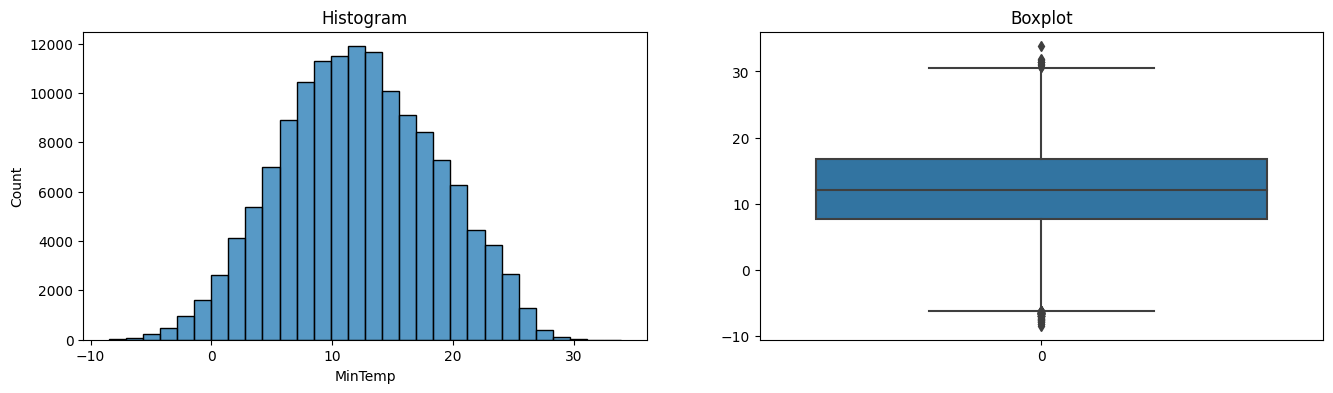

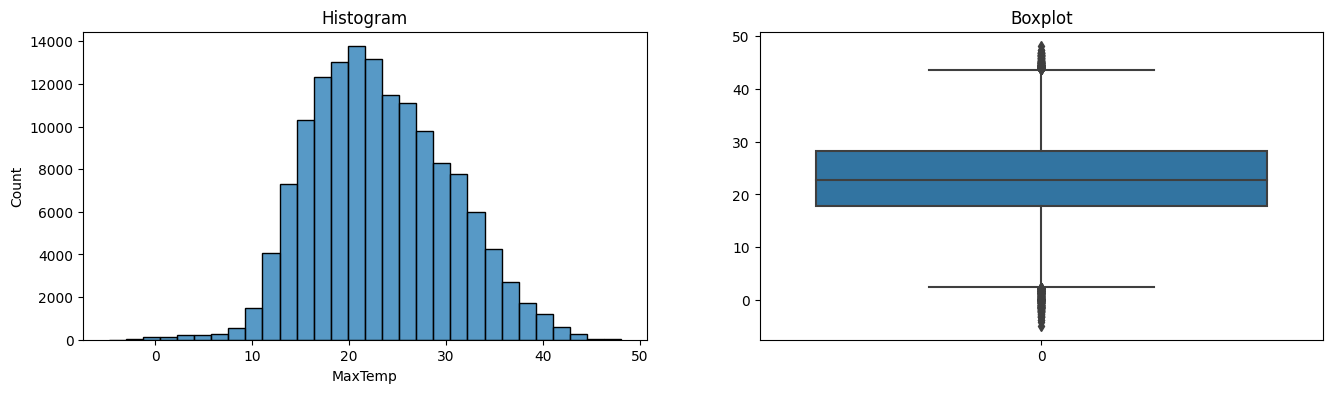

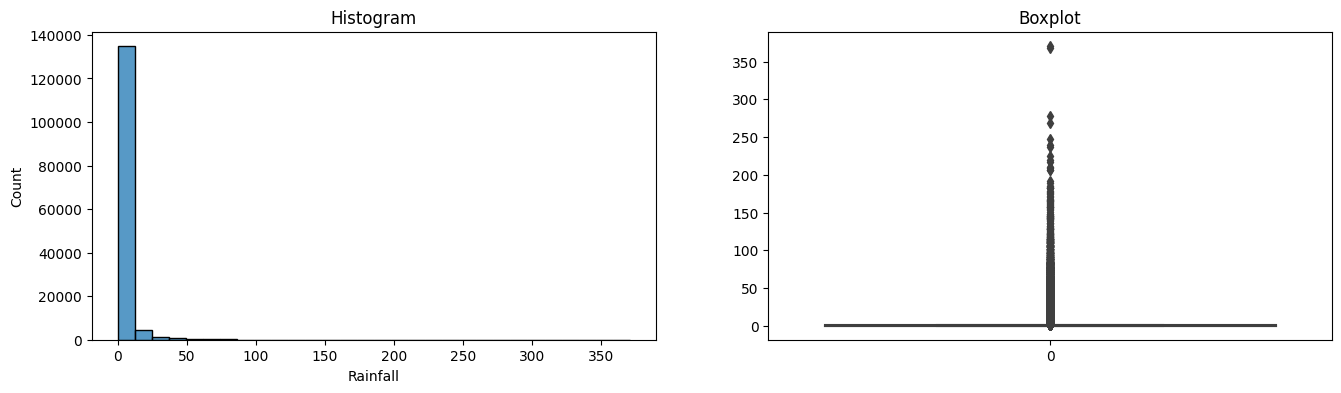

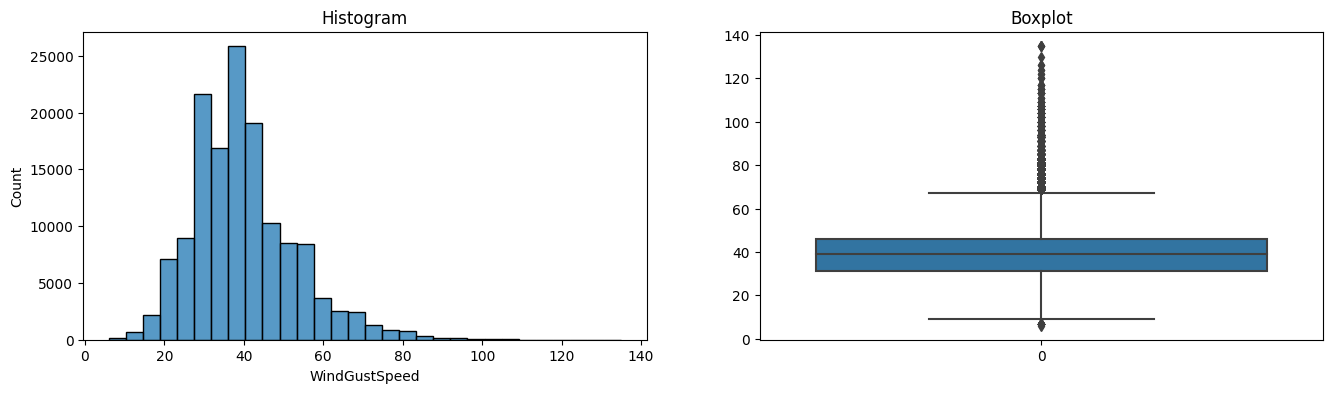

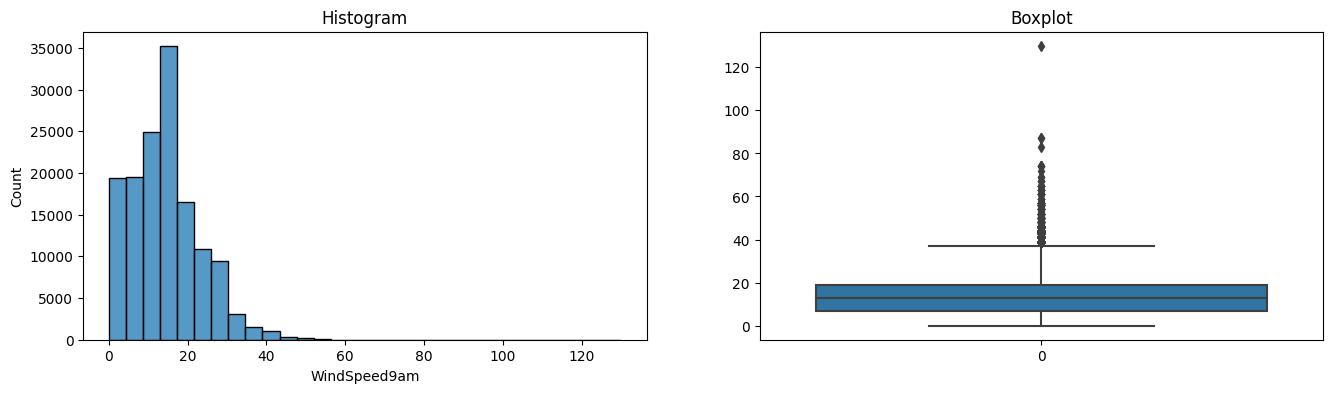

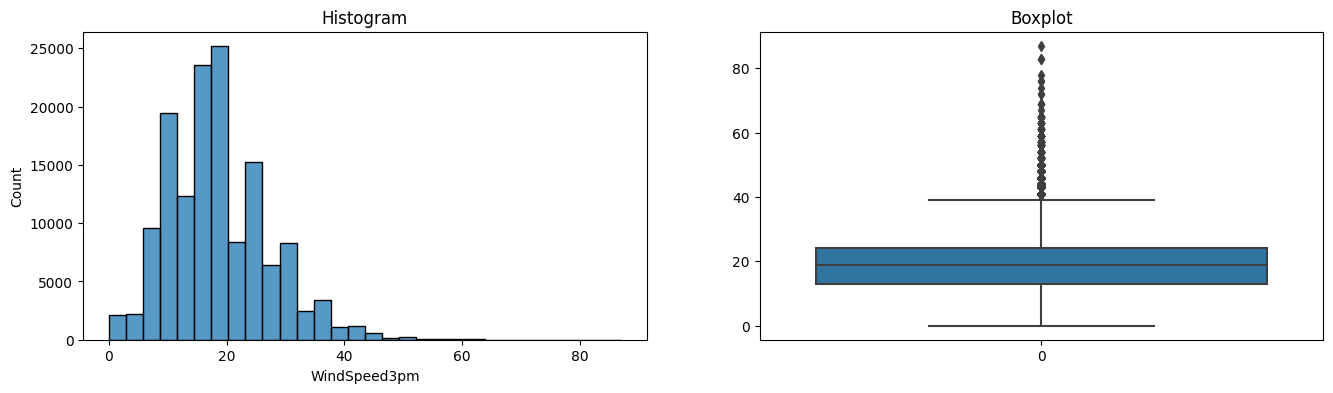

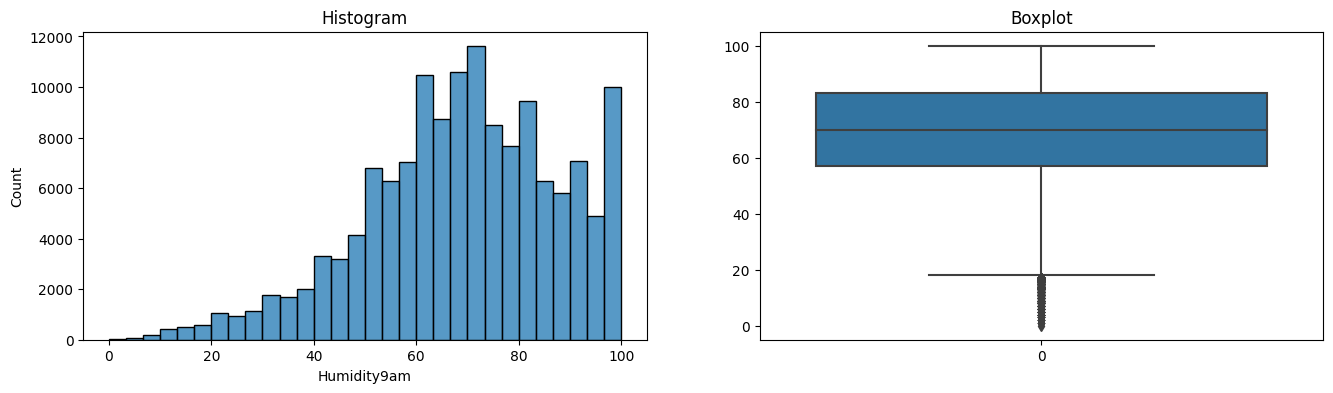

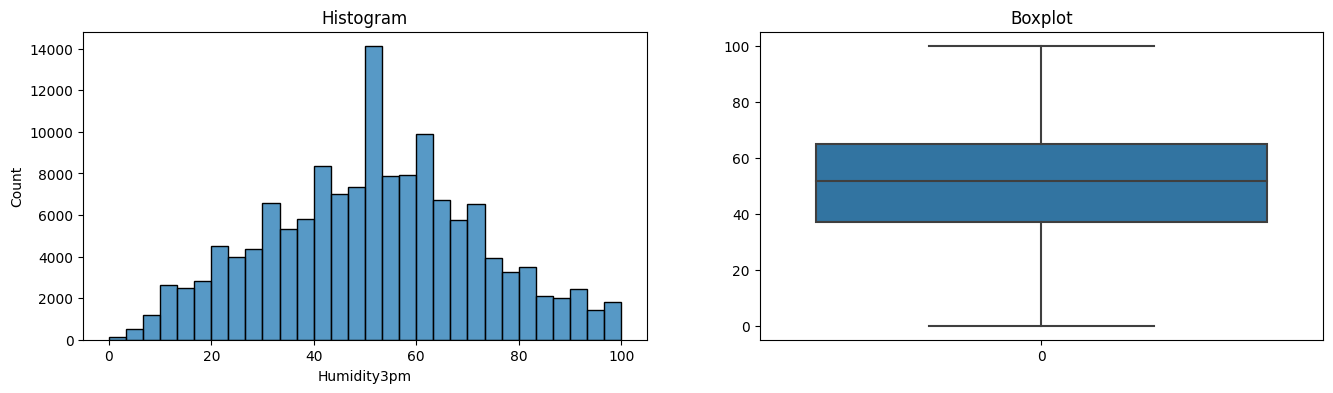

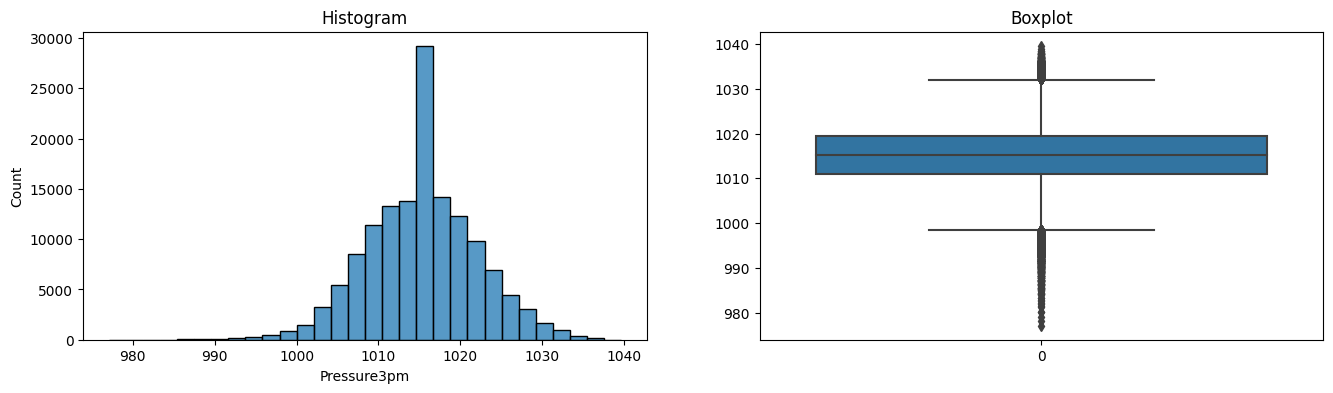

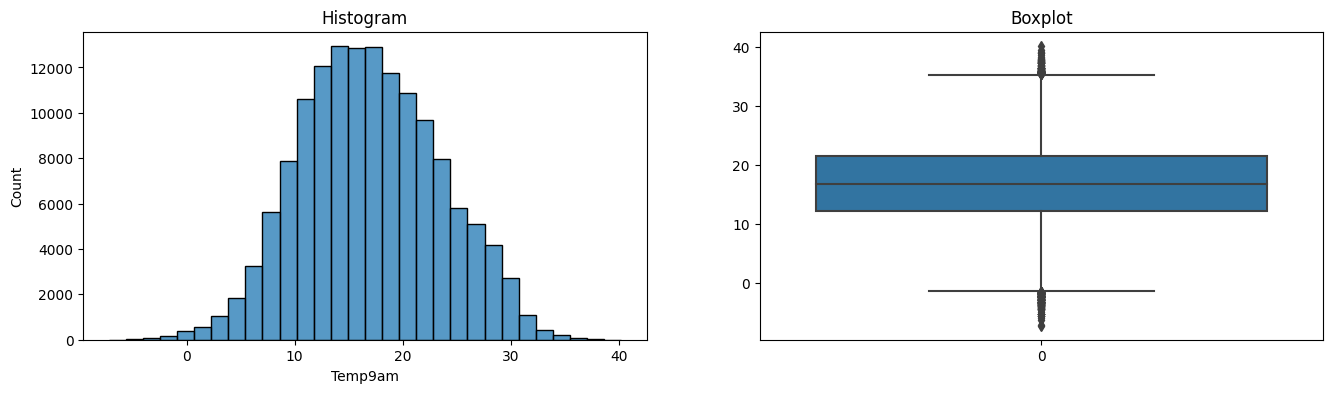

In [ ]:
# melihat setiap kolom untuk mencari outlier menggunakan boxplot dan histogram

for col in numcols.columns:
  plt.figure(figsize=(16,4))

  plt.subplot(1,2,1)
  sns.histplot(df_dropcols[col],bins = 30)
  plt.title('Histogram')

  plt.subplot(1,2,2)
  sns.boxplot(df_dropcols[col])
  plt.title('Boxplot')

  plt.show()

Dari plot boxplot diatas bisa dilihat pada kolom 'MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure3pm','Temp9am','Rainfall' terdapat outlier. Jadi Akan ditangani Dengan Quartile

In [ ]:
# membuat list untuk kolo yang memiliki outliers
outlier_cols = ['MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure3pm','Temp9am','Rainfall']

# handling outlier
for cols in outlier_cols:
    Q1=df_dropcols[cols].quantile(0.25)
    Q3=df_dropcols[cols].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    df_dropcols.loc[df_dropcols[cols] < lower_boundary,cols] = lower_boundary
    df_dropcols.loc[df_dropcols[cols] > upper_boundary,cols] = upper_boundary

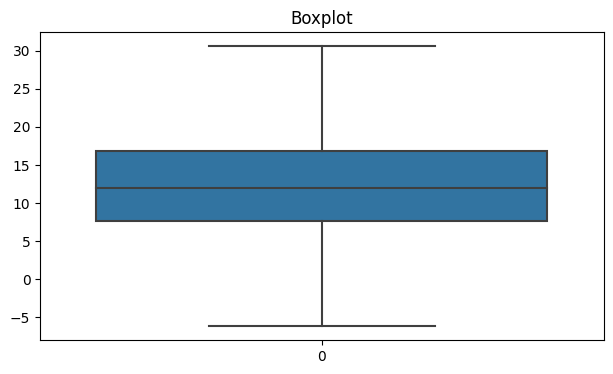

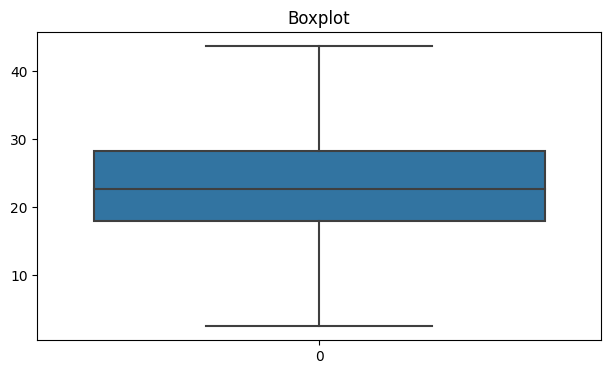

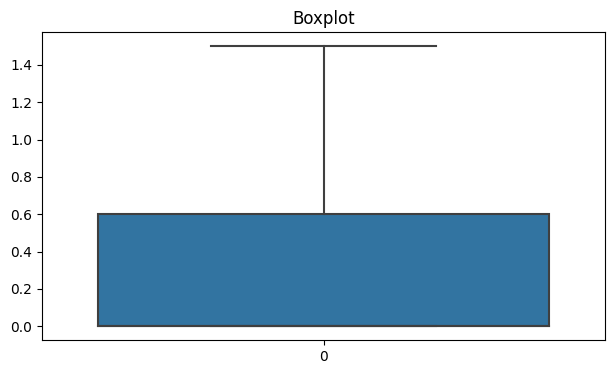

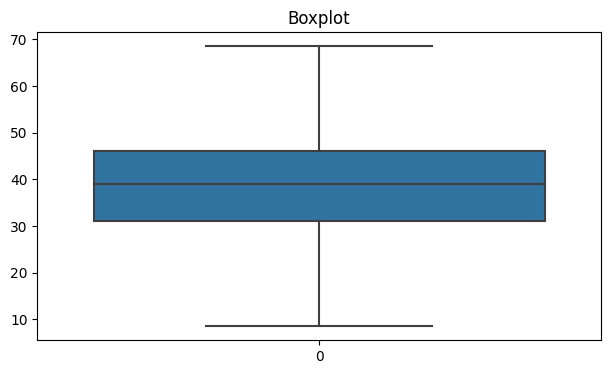

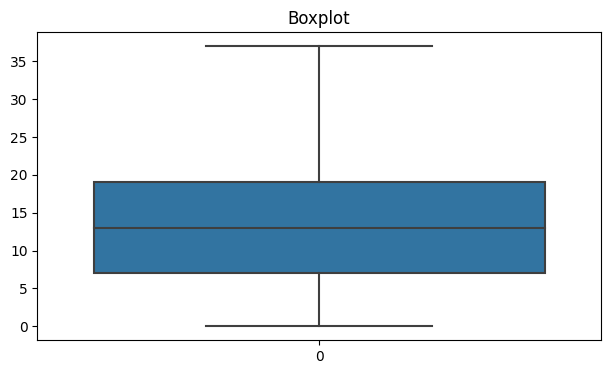

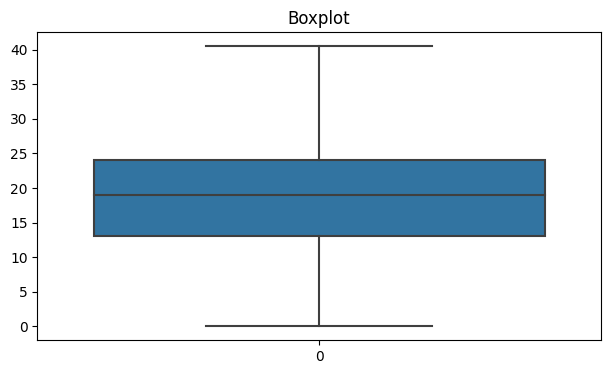

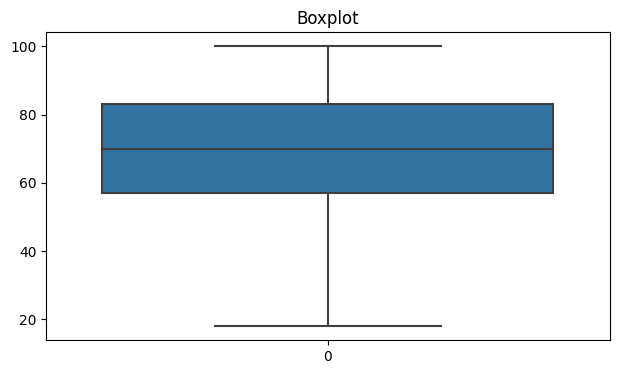

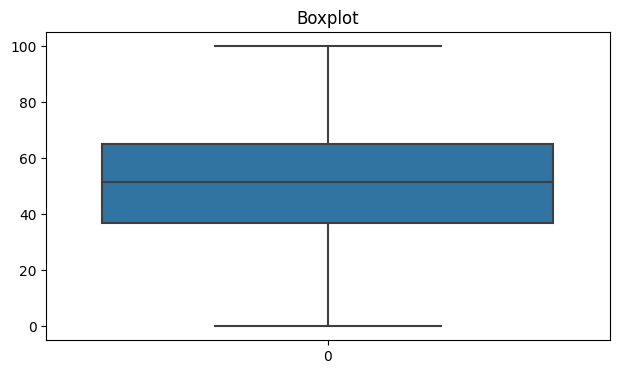

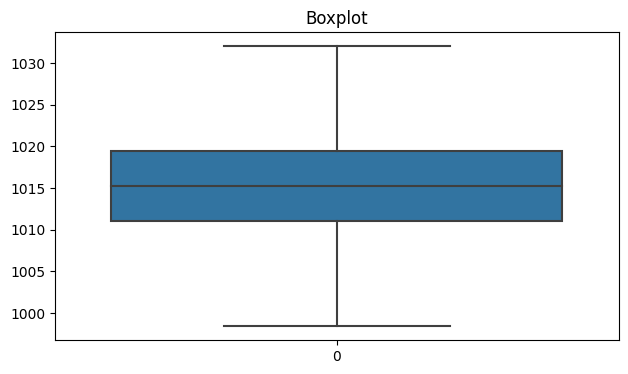

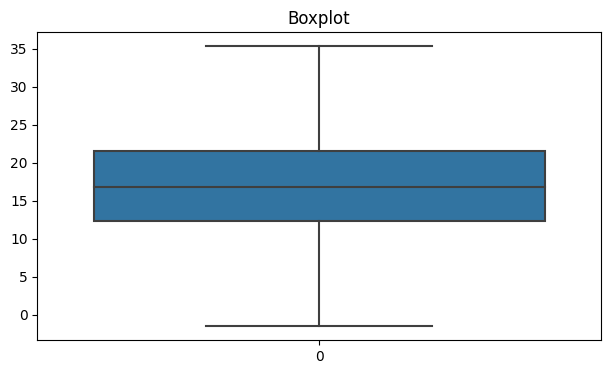

In [ ]:
# mengecek kembali outlier menggunakan boxplot
for col in numcols.columns:
  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  sns.boxplot(df_dropcols[col])
  plt.title('Boxplot')

  plt.show()

# E. Exploratory Data Analysis

## Melihat Balance dari Label

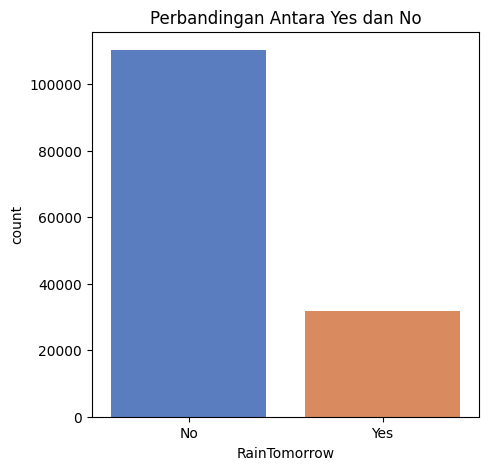

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_dropcols['RainTomorrow'], palette="muted")
plt.title("Perbandingan Antara Yes dan No")
plt.show()

Untuk balance dari label dataset yang ada, bisa disimpilkan bahwa dataset ini imbalance dan perlu pengaturan agar no dan yes seimbang.

In [ ]:
# Mencoba Cek Unique Values di setiap kategorikal kolom
catcols_fix = df_dropcols.select_dtypes(include=['object'])
for col in catcols_fix.columns:
  uniqueVal = catcols_fix[col].unique()
  print(f"Unique values in column '{col}': \n  {uniqueVal} \n")

Unique values in column 'Date': 
  ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'] 

Unique values in column 'Location': 
  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

Unique values in column 'WindGustDir': 
  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW'] 

Unique values in column 'WindDir9am': 
  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE

In [ ]:
for cols in catcols_fix:
  nunique = catcols_fix[cols].nunique()
  print(f"Jumlah unique values {cols}: {nunique} ")

Jumlah unique values Date: 3436 
Jumlah unique values Location: 49 
Jumlah unique values WindGustDir: 16 
Jumlah unique values WindDir9am: 16 
Jumlah unique values WindDir3pm: 16 
Jumlah unique values RainToday: 2 
Jumlah unique values RainTomorrow: 2 


## Analisa kolom location

In [ ]:
# Melihat tingkat perbandingan hujan di setiap lokasi
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

px.histogram(df_dropcols, x='Location',
             title='Location vs. Rainy Days',
             color='RainToday')

Dari plot curah hujan di tiap lokasi bisa disimpulkan berikut:

1. Distribusi data yang hampir seragam di seluruh lokasi.
2. Nhil, Katherine, Uluru melaporkan hujan paling sedikit.
3. PortLand menerima hujan paling banyak di antara 49 lokasi.
4. Lokasi secara pasti merupakan faktor dalam menentukan apakah akan hujan
   besok atau tidak.

In [ ]:
MinTempLoc = df_dropcols.loc[df_dropcols['RainTomorrow'] == 'Yes']
MinTempLoc.head(2)


Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
8   2008-12-09   Albury      9.7     31.9       0.0         NNW   
10  2008-12-11   Albury     13.4     30.4       0.0           N   

    WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
8            68.5         SE         NW           7.0          28.0   
10           30.0        SSE        ESE          17.0           6.0   

    Humidity9am  Humidity3pm  Pressure3pm  Temp9am RainToday RainTomorrow  
8          42.0          9.0       1003.6     18.3        No          Yes  
10         48.0         22.0       1008.7     20.4        No          Yes

In [ ]:
rata_rata_min_temp = df.groupby('Location')['MinTemp'].mean().reset_index()
rata_rata_min_temp.head()


Location    MinTemp
0       Adelaide  12.579505
1         Albany  12.948438
2         Albury   9.530604
3   AliceSprings  13.142284
4  BadgerysCreek  11.131719

In [ ]:
fig = px.histogram(rata_rata_min_temp, x='Location', y='MinTemp',
                   title="Rata-rata MinTemp untuk Setiap Lokasi Ketika RainTomorrow 'Yes' ",
                   color='Location',
                   labels={'MinTemp': 'Rata-rata MinTemp'},
                   opacity=1)

fig.update_layout(barmode='group')
fig.show()

Rata rata suhu Minimal pada tiap lokasi ketika Label RainTOmorrow adalah 'Yes'.
Terlihat bahwa di sebagaian besar lokasi saat besok akan hujan suhu yang didapat rendah. Namun juga ada dibeberapa lokasi ketika suhu nya tinggi seperti di Cairns,GOldCOast, Katherine, dan Townsville Besoknya terjadi Hujan.



## Analisa Kolom yang Berhubungan Dengan Temperatur

In [ ]:
df_dropcols.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
temp_cols = df_dropcols[['MinTemp','MaxTemp','Temp9am','RainToday','RainTomorrow']]
temp_cols['RainToday'] = label_encoder.fit_transform(temp_cols['RainToday'])
temp_cols['RainTomorrow'] = label_encoder.fit_transform(temp_cols['RainTomorrow'])
temp_cols.head()

MinTemp  MaxTemp  Temp9am  RainToday  RainTomorrow
0     13.4     22.9     16.9          0             0
1      7.4     25.1     17.2          0             0
2     12.9     25.7     21.0          0             0
3      9.2     28.0     18.1          0             0
4     17.5     32.3     17.8          0             0

In [ ]:
# normalisasi kolom numerik agar korelasi akurat
df_normalized = temp_cols.copy()
kolom_numerik = ['MinTemp', 'MaxTemp', 'Temp9am']
scaler = MinMaxScaler()
df_normalized[kolom_numerik] = scaler.fit_transform(temp_cols[kolom_numerik])
df_normalized

MinTemp   MaxTemp   Temp9am  RainToday  RainTomorrow
0       0.532609  0.496359  0.500000          0             0
1       0.369565  0.549757  0.508152          0             0
2       0.519022  0.564320  0.611413          0             0
3       0.418478  0.620146  0.532609          0             0
4       0.644022  0.724515  0.524457          0             0
...          ...       ...       ...        ...           ...
145454  0.263587  0.469660  0.296196          0             0
145455  0.244565  0.508495  0.315217          0             0
145456  0.266304  0.554612  0.336957          0             0
145457  0.315217  0.593447  0.380435          0             0
145458  0.380435  0.595874  0.451087          0             0

[142193 rows x 5 columns]

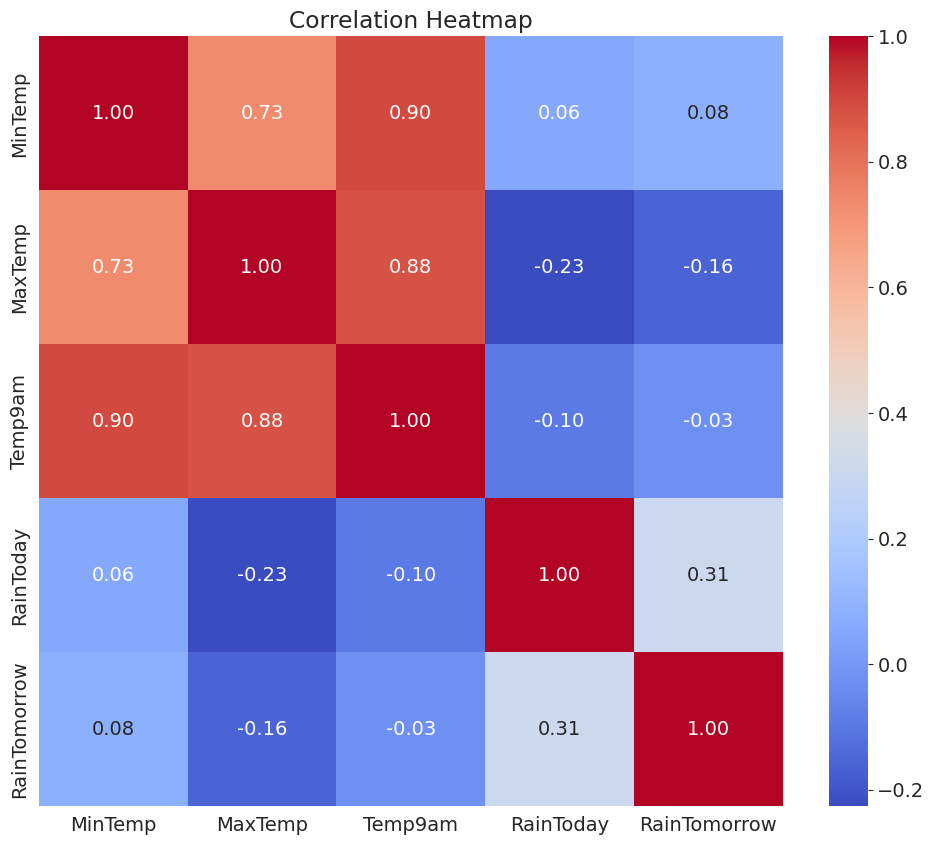

In [ ]:
correlation_matrix = df_normalized.corr()

# Menggunakan heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Bisa dilihat bahwa MinTemp, MaxTemp dan Temp9am memiliki korelasi rendah terhadap RainTomorrow namun Korelasi antar kolom kolom temperatur cukup kuat. Dan disaat temperatur dikaitkan ke setiap kolom location, menurut saya memiliki dampak yang cukup ada, jadi ketiga kolom tersebut tetap digunakan

In [ ]:
# Melihat perbandingan MinTemp dan MaxTemp pada RainToday
px.scatter(temp_cols.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

Ini menunjukkan korelasi positif linier antara MinTemp dan MaxTemp. Titik-titik di tengahnya tumpang tindih, menandakan jika hari ini turun hujan, variasi MinTemp dan MaxTemp rendah.

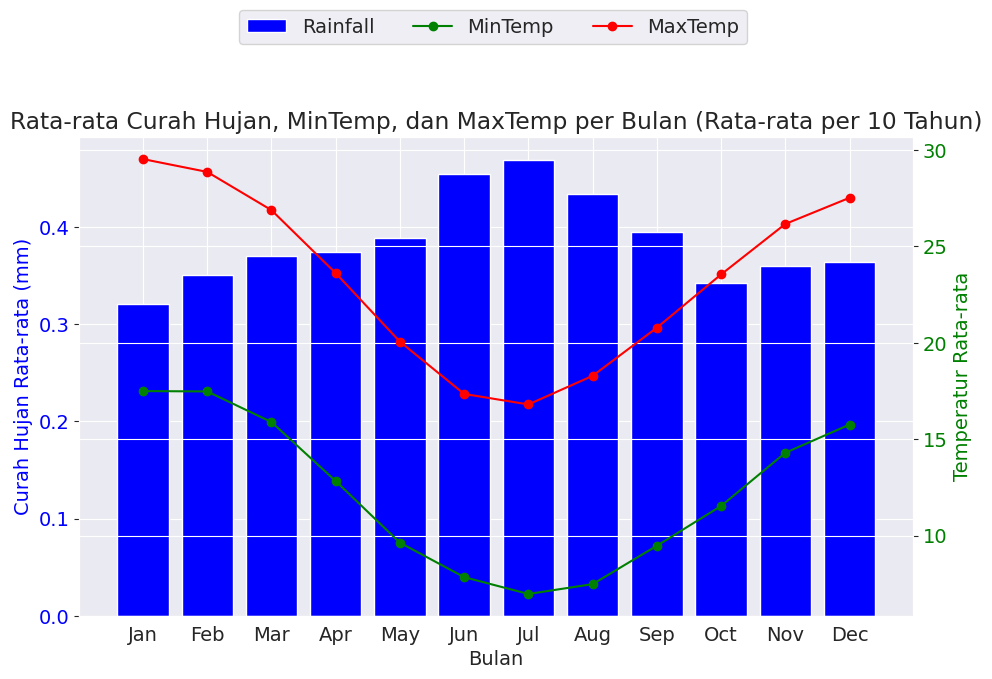

In [ ]:
df_temp = df_dropcols.copy()
# Mengubah kolom 'Date' dari objek menjadi tanggal
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
# Set kolom 'Date' sebagai indeks
df_temp.set_index('Date', inplace=True)

# Menghitung rata-rata bulanan dan merata-ratakan nilainya untuk setiap bulan yang sama selama 10 tahun
monthly_avg = df_temp.groupby(df_temp.index.month).mean()

# Membuat plot
fig, ax1 = plt.subplots()

# Plot bar untuk rata-rata curah hujan
ax1.bar(monthly_avg.index, monthly_avg['Rainfall'], color='b', label='Rainfall')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Curah Hujan Rata-rata (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Menambahkan garis untuk MinTemp dan MaxTemp
ax2 = ax1.twinx()
ax2.plot(monthly_avg.index, monthly_avg['MinTemp'], marker='o', color='g', label='MinTemp')
ax2.plot(monthly_avg.index, monthly_avg['MaxTemp'], marker='o', color='r', label='MaxTemp')
ax2.set_ylabel('Temperatur Rata-rata', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Menambahkan label dan judul
plt.title('Rata-rata Curah Hujan, MinTemp, dan MaxTemp per Bulan (Rata-rata per 10 Tahun)')

# Menampilkan legenda
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Terlihat bahwa Rata rata Curah Hujan naik pada bulan NOvember Sampai pada bulan Februari. Dan menurun hingga october. Namun pada BUlan Juni Rata rata curah hujan lumayan tinggi.

Untuk Temperatur, rata rata MaxTemp yang paling tinggi berada di bulan januari. Pada bulan februari juga terlihat bahwa MaxTemp sangat tinggi namun curah hujan juga sangat tinggi. UNtuk rata rata MinTemp paling rendah ada pada bulan juli dengan curah hujan yang sedang.

## Analisa Kolom yang Berhubungan dengan Wind

In [ ]:
df_dropcols.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
wind_cols = df_dropcols[['WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','RainToday','RainTomorrow']]
wind_cols.head()



WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm RainToday RainTomorrow  
0          24.0        No           No  
1          22.0        No           No  
2          26.0        No           No  
3           9.0        No           No  
4          20.0        No           No

In [ ]:
# encode kolom kategorikal
wind_cols['WindGustDir'] = label_encoder.fit_transform(wind_cols['WindGustDir'])
wind_cols['WindDir9am'] = label_encoder.fit_transform(wind_cols['WindDir9am'])
wind_cols['WindDir3pm'] = label_encoder.fit_transform(wind_cols['WindDir3pm'])
wind_cols['RainToday'] = label_encoder.fit_transform(wind_cols['RainToday'])
wind_cols['RainTomorrow'] = label_encoder.fit_transform(wind_cols['RainTomorrow'])

wind_cols.head()

WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0           13           44.0          13          14          20.0   
1           14           44.0           6          15           4.0   
2           15           46.0          13          15          19.0   
3            4           24.0           9           0          11.0   
4           13           41.0           1           7           7.0   

   WindSpeed3pm  RainToday  RainTomorrow  
0          24.0          0             0  
1          22.0          0             0  
2          26.0          0             0  
3           9.0          0             0  
4          20.0          0             0

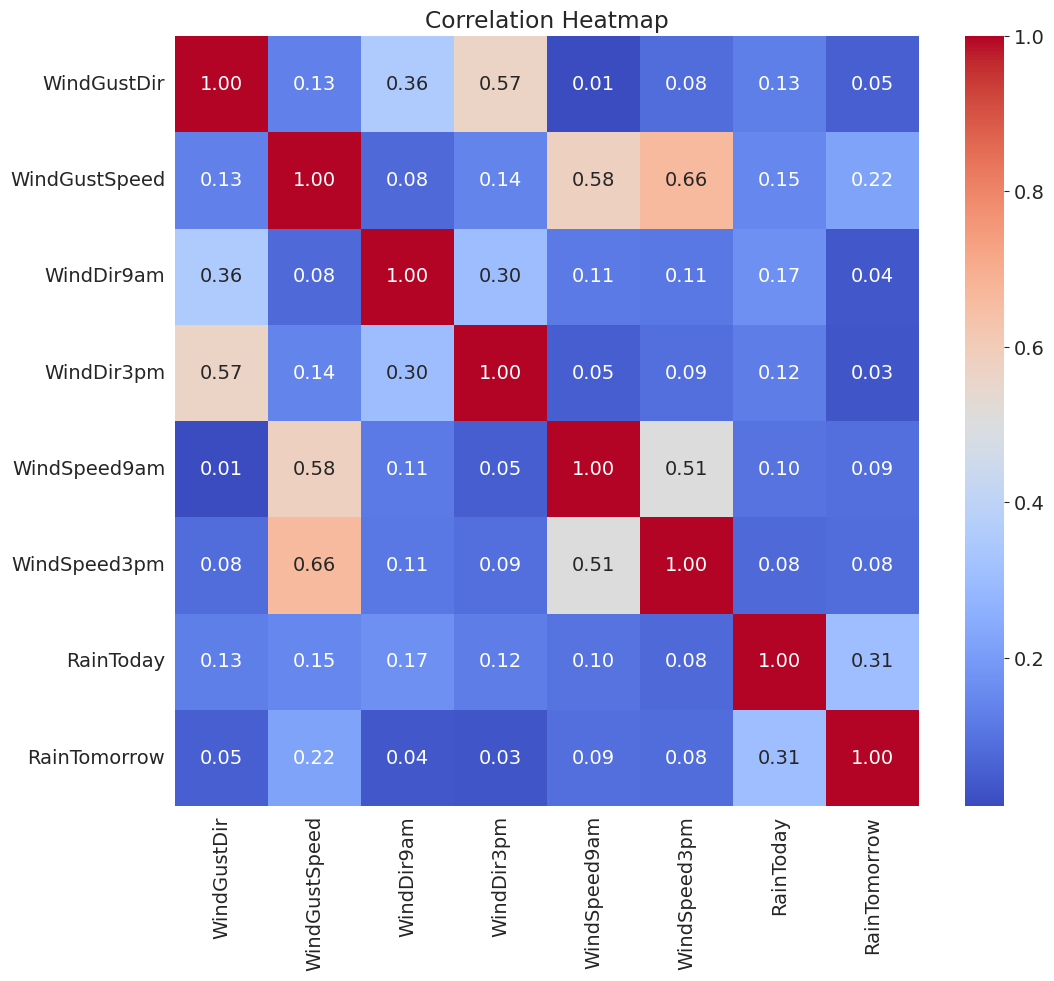

In [ ]:
# Melihat korelasi antara kolom kolom wind dengan kolom kolom rain menggunakan heatmap
wind_corr = wind_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(wind_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

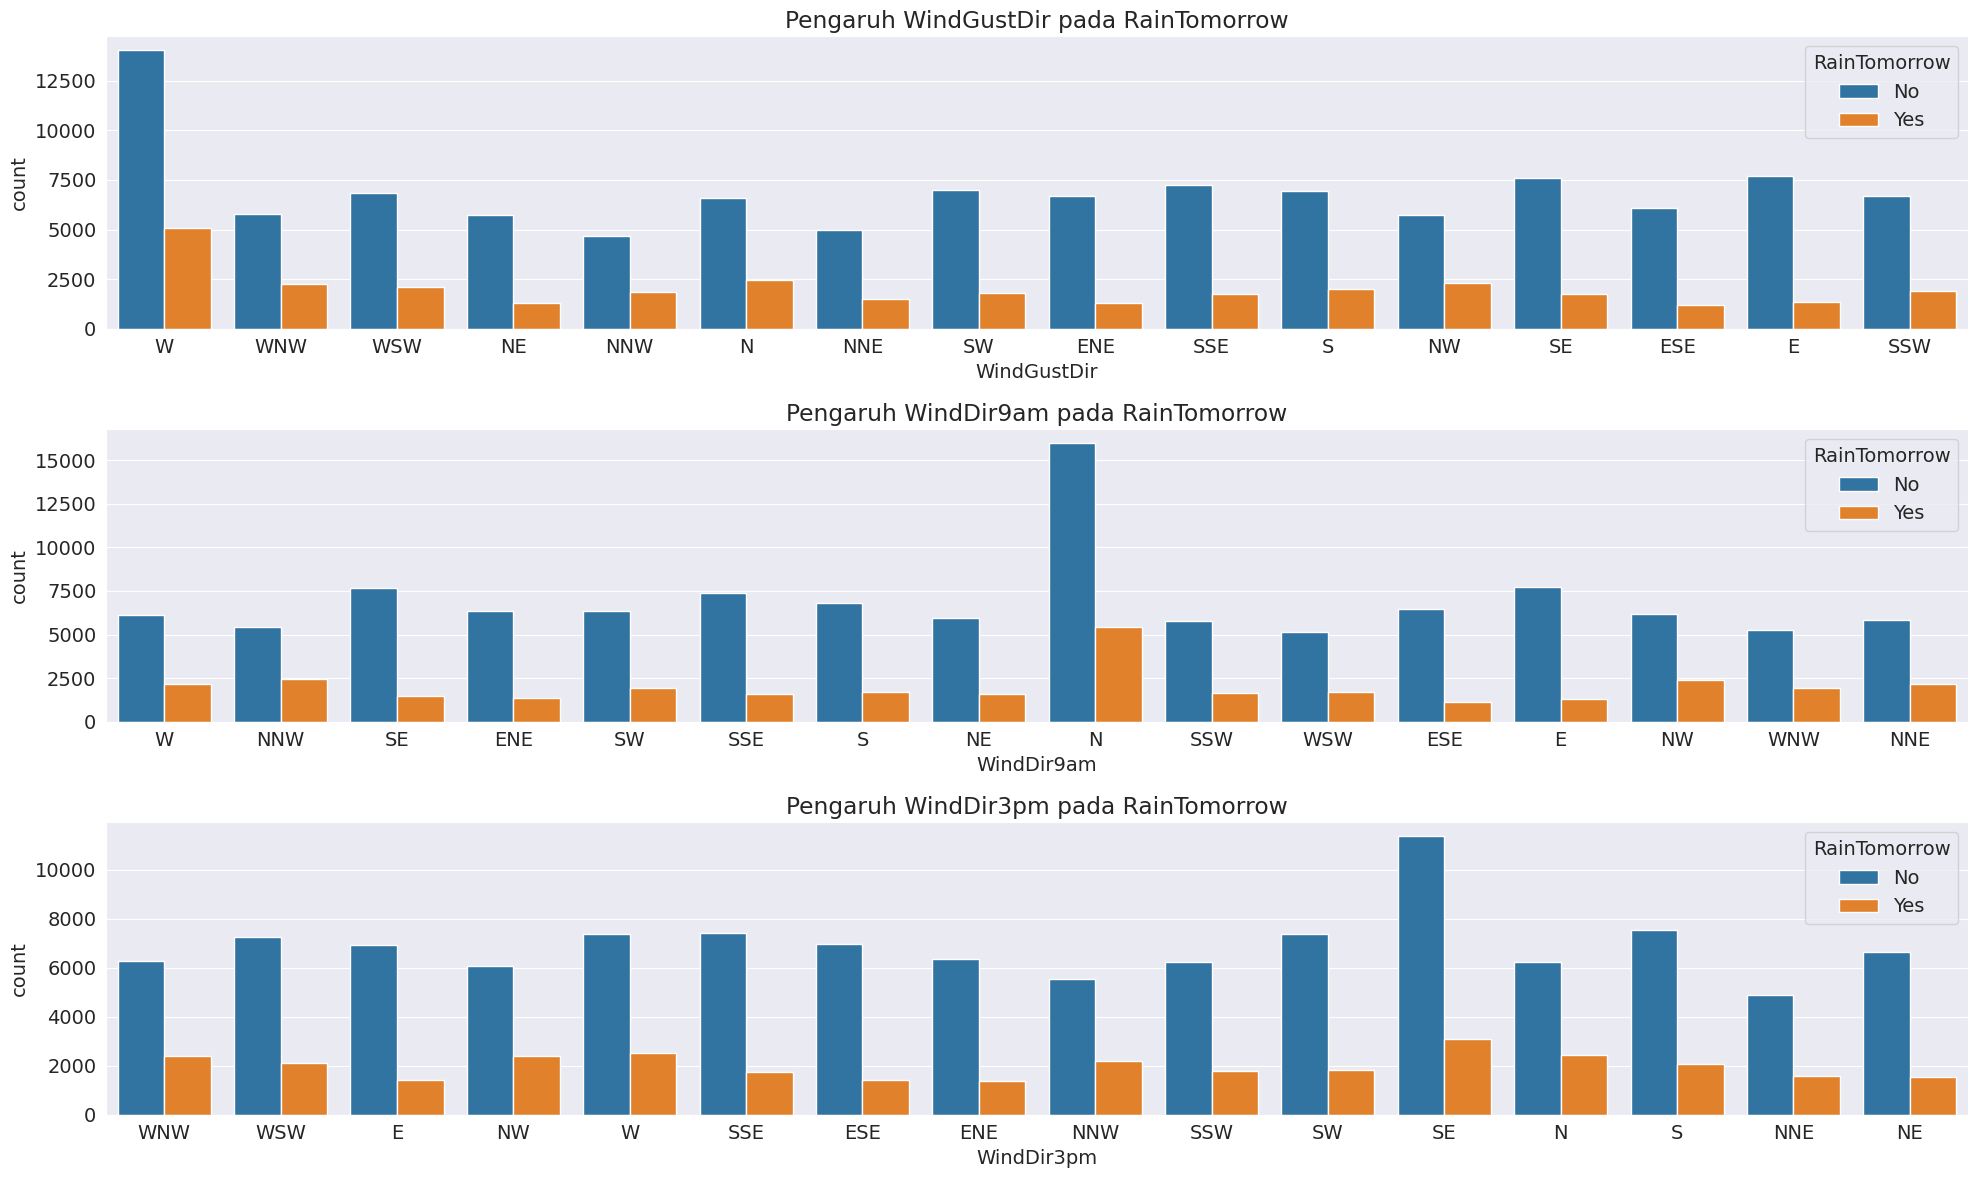

In [ ]:
# Pengaruh variabel lain terhadap RainTomorrow
fig, axes = plt.subplots(3, 1, figsize=(20, 12))

sns.countplot(ax=axes[0], x='WindGustDir', hue='RainTomorrow', data=df_dropcols)
axes[0].set_title('Pengaruh WindGustDir pada RainTomorrow')

sns.countplot(ax=axes[1], x='WindDir9am', hue='RainTomorrow', data=df_dropcols)
axes[1].set_title('Pengaruh WindDir9am pada RainTomorrow')

sns.countplot(ax=axes[2], x='WindDir3pm', hue='RainTomorrow', data=df_dropcols)
axes[2].set_title('Pengaruh WindDir3pm pada RainTomorrow')


plt.tight_layout()
plt.show()

DI PLot WIndGustDir Arah angin 'W' atau Barat mempunyai pengaruh  terhadap terjadi nya hujan pada besok hari.

Di plot WIndDir9am arah angin N atau utara memiliki pengaruh terhadap terjadinya hujan besok  

Dan di Plot WindDIr3pm ada beberapa arahh angin yang terlihat mempengaruhi terjadinya hujan besok seperti pada WNW,NW,W, dan SE. Namun pada SE pengaruh tidak terjadinya hujan juga tinggi.

Namun perlu dilihat juga bahwa semua arah mata angin tidak terlalu besar mempengaruhi terjadinya hujan besok karena setiap mata angin lebih banyak menunjukan tidak terjadinya hujan pada besok hari

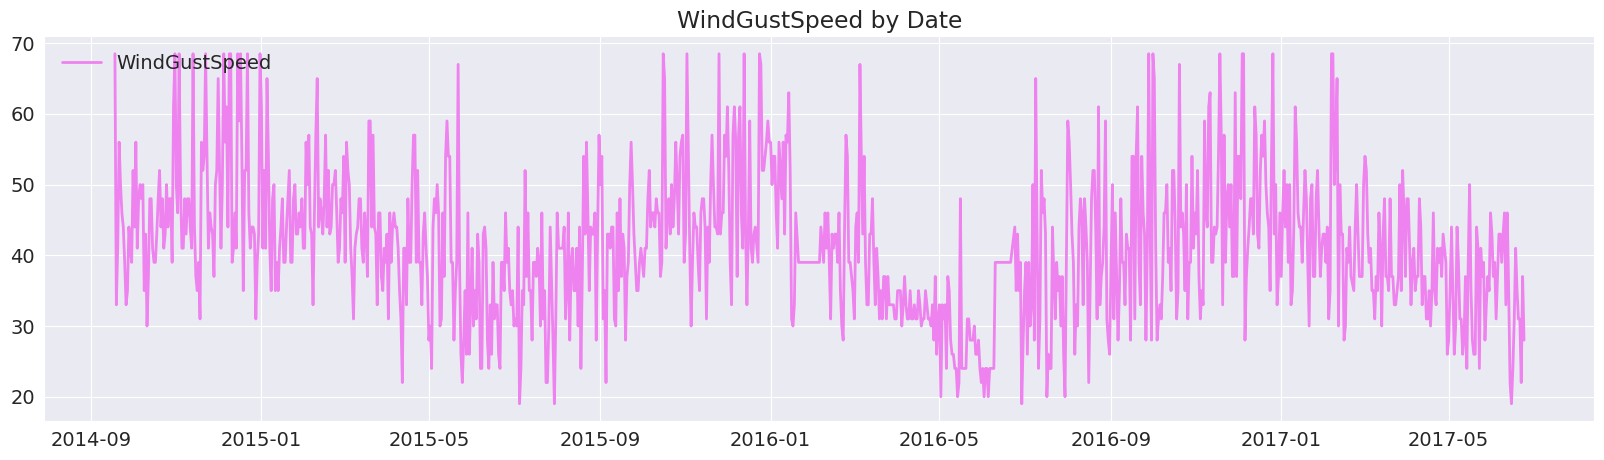

In [ ]:
df_dropcols['Date'] = pd.to_datetime(df_dropcols['Date'])
df_dateplot = df_dropcols.iloc[-1000:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['WindGustSpeed'],color='violet', linewidth=2, label= 'WindGustSpeed')
plt.legend(loc='upper left', frameon=False)
plt.title('WindGustSpeed by Date')
plt.show()

Dari Line Plot bisa terlihat pola kecepatan angin pada WIndGustSpeed di 1000 data terakhir pada dataset.
Terlihat tahun 2015 bulan januari kecepatan angin sangat tinggi dan sering mencapai hampir 70 km/jam. Dan pada bulan Mei sampai bulan September sedikit menurun setelah itu meningkat lagi.

Dan pada tahun 2016 pada bulan Mei juga Kecepatan angin menurun lagi, dan begitu juga pada tahun 2017 bulan Mei.
Bisa disimpulkan bahwa Kecepatan angin pada bulan Mei pada setiap tahun mungkin mengalami penurunan.

## Analisa Humidity

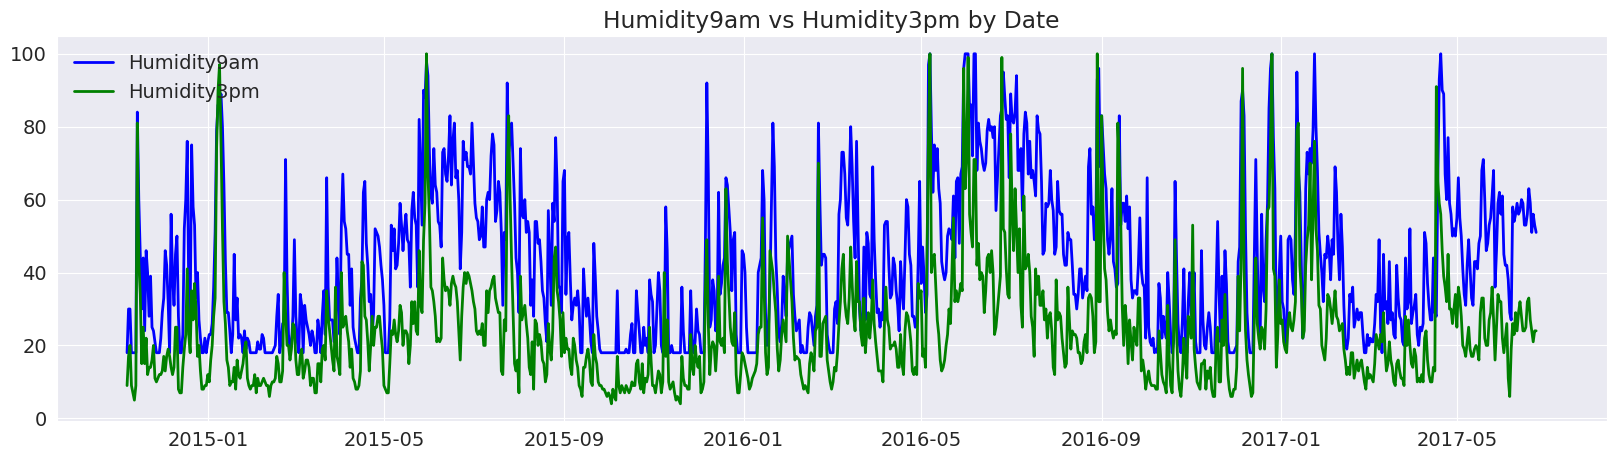

In [ ]:
# melihat prebedaan dan tren humidity9am dan humidity3pm dari tanggal
df_dateplot = df_dropcols.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Humidity9am'],color='blue', linewidth=2, label= 'Humidity9am')
plt.plot(df_dateplot['Date'],df_dateplot['Humidity3pm'],color='green', linewidth=2, label= 'Humidity3pm')
plt.legend(loc='upper left', frameon=False)
plt.title('Humidity9am vs Humidity3pm by Date')
plt.show()

Dari plot di atas kita dapat melihat bahwa kelembapan tinggi pada bulan Juni-Jul dan juga pada waktu tersebut terdapat perbedaan yang baik antara kelembapan sekitar pukul 09.00 dan 15.00.

# F. Data Preprocessing

In [ ]:
df_dropcols.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

## Membuat dataframe baru yang berisi kolom kolom yang diperlukan untuk pembuatan model

In [ ]:
df_fix = df_dropcols.drop(columns = 'Date')
df_fix.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df_fix.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure3pm  Temp9am RainToday RainTomorrow  
0       1007.1     16.9        No           No  
1       1007.8     17.2        No           No  
2       1008.7     21.0        No           No  
3       1012.8     18.1        No           No  
4       1006.0     17.8        No           No

## MengEncode Kategortikal kolom  

In [ ]:
le ={}
for col in df_fix.select_dtypes(include=['object']):  # Memilih kolom-kolom kategorikal
    label_encoder = LabelEncoder()
    df_fix[col] = label_encoder.fit_transform(df_fix[col])  # Menggunakan LabelEncoder pada kolom kategorikal
    le[col] = label_encoder

df_fix.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0         2     13.4     22.9       0.6           13           44.0   
1         2      7.4     25.1       0.0           14           44.0   
2         2     12.9     25.7       0.0           15           46.0   
3         2      9.2     28.0       0.0            4           24.0   
4         2     17.5     32.3       1.0           13           41.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   
1           6          15           4.0          22.0         44.0   
2          13          15          19.0          26.0         38.0   
3           9           0          11.0           9.0         45.0   
4           1           7           7.0          20.0         82.0   

   Humidity3pm  Pressure3pm  Temp9am  RainToday  RainTomorrow  
0         22.0       1007.1     16.9          0             0  
1         25.0       1007.8     17.2          0             0  
2         30.0       1008.7     21.0          0             0  
3         16.0       1012.8     18.1          0             0  
4         33.0       1006.0     17.8          0             0

## Split Data menjadi X dan Y

In [ ]:
from re import X
X= df_fix.drop(columns = 'RainTomorrow')
y= df_fix[['RainTomorrow']]

In [ ]:
X.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0         2     13.4     22.9       0.6           13           44.0   
1         2      7.4     25.1       0.0           14           44.0   
2         2     12.9     25.7       0.0           15           46.0   
3         2      9.2     28.0       0.0            4           24.0   
4         2     17.5     32.3       1.0           13           41.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   
1           6          15           4.0          22.0         44.0   
2          13          15          19.0          26.0         38.0   
3           9           0          11.0           9.0         45.0   
4           1           7           7.0          20.0         82.0   

   Humidity3pm  Pressure3pm  Temp9am  RainToday  
0         22.0       1007.1     16.9          0  
1         25.0       1007.8     17.2          0  
2         30.0       1008.7     21.0          0  
3         16.0       1012.8     18.1          0  
4         33.0       1006.0     17.8          0

In [ ]:
y.head()

RainTomorrow
0             0
1             0
2             0
3             0
4             0

## Normalisasi Data

In [ ]:
# Normalisasi X menggunakan StandarScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-1.5270045 ,  0.1899482 , -0.04652138, ..., -1.24731691,
        -0.01369018, -0.53296232],
       [-1.5270045 , -0.74931964,  0.26368904, ..., -1.14051939,
         0.03271961, -0.53296232],
       [-1.5270045 ,  0.11167588,  0.34829188, ..., -1.0032083 ,
         0.62057691, -0.53296232],
       ...,
       [ 1.21224943, -1.34418928,  0.29188999, ...,  0.58349769,
        -0.94188593, -0.53296232],
       [ 1.21224943, -1.06240892,  0.51749757, ...,  0.23259156,
        -0.69436706, -0.53296232],
       [ 1.21224943, -0.68670179,  0.53159804, ...,  0.18682119,
        -0.2921489 , -0.53296232]])

## Split Data menjadi Train dan Test

In [ ]:
# Split Data Biasa Tanpa menggunakan SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Split Data Menggunakan SMOTE untuk mengatasi IMbalanced pada Target
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)

# G. Pendefinisian Model

## 1. Logistic Regression

In [ ]:
# model lr biasa
lr_model = LogisticRegression( solver= 'liblinear', random_state= 24)

# model lr SMOTE
lr_SMOTE_model = LogisticRegression( solver= 'liblinear', random_state= 24)

## 2. SVM

In [ ]:
# model svm
svm_model = SVC(kernel='linear', random_state=42)


# H. Pelatihan Model

## 1. Logistic Regression

### a. Logistic Regression Biasa/default

In [ ]:
# fit Xtrain dan y train
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=24, solver='liblinear')

### b. LogisticRegression SMOTE

In [ ]:
lr_SMOTE_model.fit(X_SMOTE, y_SMOTE)

LogisticRegression(random_state=24, solver='liblinear')

## 2. SVM

In [ ]:
# fit Xtrain dan y train
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# I. Evaluasi Model

## 1. Logistic Regression

### a. Logistic Regression Biasa/default

In [ ]:
# Evaluasi model pada data uji
y_pred = lr_model.predict(X_test)

# melihat nilai akurasi
print(f'score = {lr_model.score(X_train,y_train)}')
print(f'score = {lr_model.score(X_test,y_test)}')

score = 0.8396945797960517
score = 0.8383187209902011


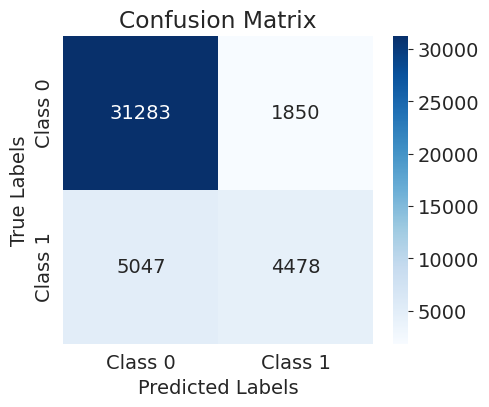

In [ ]:
# melihat confusion matrix
lr_cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# melihat classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     33133
           1       0.71      0.47      0.56      9525

    accuracy                           0.84     42658
   macro avg       0.78      0.71      0.73     42658
weighted avg       0.83      0.84      0.83     42658



### b. Logistic Regression SMOTE

In [ ]:
# Evaluasi model pada data uji
y_SMOTEpred = lr_SMOTE_model.predict(X_test)

# melihat nilai akurasi
print(f'score = {lr_SMOTE_model.score(X_SMOTE,y_SMOTE)}')
print(f'score = {lr_SMOTE_model.score(X_test,y_test)}')

score = 0.7709534482982003
score = 0.7769468798349665


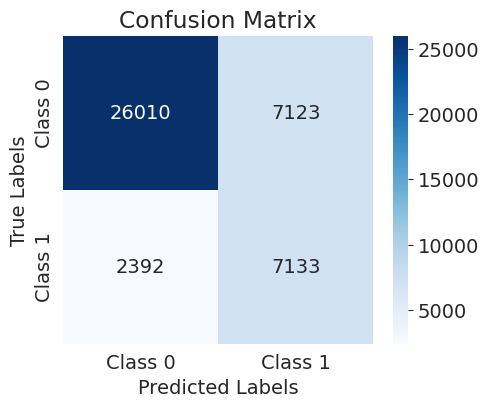

In [ ]:
# melihat confusion matrix
lrSMOTE_cm = confusion_matrix(y_test, y_SMOTEpred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(lrSMOTE_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# melihat classification report
print("Classification Report:\n", classification_report(y_test, y_SMOTEpred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     33133
           1       0.50      0.75      0.60      9525

    accuracy                           0.78     42658
   macro avg       0.71      0.77      0.72     42658
weighted avg       0.82      0.78      0.79     42658



## SVM

In [ ]:
# Evaluasi model pada data uji
y_pred_svm = svm_model.predict(X_test)

# melihat nilai akurasi
print(f'score = {svm_model.score(X_train,y_train)}')
print(f'score = {svm_model.score(X_test,y_test)}')

score = 0.8388406088310645
score = 0.8377326644474659


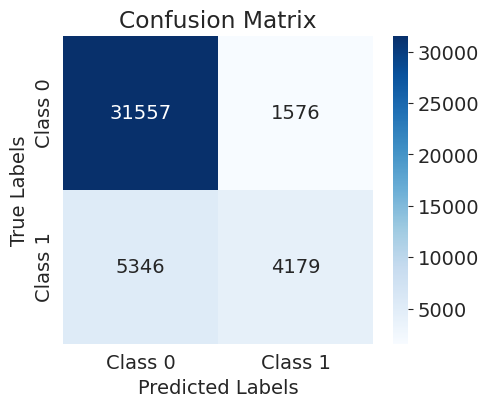

In [ ]:
# melihat confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# melihat classification report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     33133
           1       0.73      0.44      0.55      9525

    accuracy                           0.84     42658
   macro avg       0.79      0.70      0.72     42658
weighted avg       0.83      0.84      0.82     42658



# J. Improve Model

## a.Logistic Regression

In [ ]:
# Tentukan ruang parameter yang akan dijelajahi
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class':['auto','ovr']
}
logistic_regression_model = LogisticRegression()
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian parameter terbaik menggunakan data latih
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Akurasi Model Terbaik pada Data Uji:", accuracy)

Parameter Terbaik: {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}
Akurasi Model Terbaik pada Data Uji: 0.8381546251582352


In [ ]:
# imporve menggunakan logisctic regression cv

logregcv = LogisticRegression()
# Melakukan cross-validation dengan 5 fold
scores_cv = cross_val_score(logregcv, X_train, y_train, cv=5)

# Menampilkan akurasi setiap fold
print("Akurasi setiap fold:", scores_cv)

# Menampilkan rata-rata akurasi dari seluruh fold
print("Rata-rata akurasi:", scores_cv.mean())

Akurasi setiap fold: [0.84005626 0.83804692 0.84231677 0.8416135  0.83563571]
Rata-rata akurasi: 0.8395338323202892


In [ ]:
# menggunakan data train SMOTE
scores_cv_SMOTE = cross_val_score(logregcv, X_SMOTE, y_SMOTE, cv=5)

# Menampilkan akurasi setiap fold
print("Akurasi setiap fold:", scores_cv_SMOTE)

# Menampilkan rata-rata akurasi dari seluruh fold
print("Rata-rata akurasi:", scores_cv_SMOTE.mean())

Akurasi setiap fold: [0.76915852 0.76759628 0.77459269 0.77021993 0.77297315]
Rata-rata akurasi: 0.7709081128590338


# K. Model Inference

## Logistic Regression

In [ ]:
df_fix.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df_fix.iloc[0]

Location            2.0
MinTemp            13.4
MaxTemp            22.9
Rainfall            0.6
WindGustDir        13.0
WindGustSpeed      44.0
WindDir9am         13.0
WindDir3pm         14.0
WindSpeed9am       20.0
WindSpeed3pm       24.0
Humidity9am        71.0
Humidity3pm        22.0
Pressure3pm      1007.1
Temp9am            16.9
RainToday           0.0
RainTomorrow        0.0
Name: 0, dtype: float64

In [ ]:
# membuat data baru untuk uji coba model dengan mengambil sample dari df index ke 0

data_test = {
    'Location': [2.0],
    'MinTemp': [13.4],
    'MaxTemp': [22.9],
    'Rainfall': [0.6],
    'WindGustDir': [13.0],
    'WindGustSpeed': [44.0],
    'WindDir9am': [13.0],
    'WindDir3pm': [14.0],
    'WindSpeed9am': [20.0],
    'WindSpeed3pm': [24.0],
    'Humidity9am': [71.0],
    'Humidity3pm': [22.0],
    'Pressure3pm': [1007.1],
    'Temp9am': [16.9],
    'RainToday': [0.0]
}

data_test = pd.DataFrame(data_test)


In [ ]:
# mencoba prediksi menggunakan model logreg biasa


# normalisasi data test
data_test =scaler.fit_transform(data_test)


lr_prediction = lr_model.predict(data_test)

# menampilkan hasil prediksi
if lr_prediction == 0:
  print(f'Rain Tomorrow : Tidak Hujan / {lr_prediction}')
else:
  print(f'Rain Tomorrow : Hujan / {lr_prediction}')



Rain Tomorrow : Tidak Hujan / [0]


In [ ]:
# menggunakan SMOTE
lrSMOTE_prediction = lr_SMOTE_model.predict(data_test)

# menampilkan hasil prediksi
if lrSMOTE_prediction == 0:
  print(f'Rain Tomorrow : Tidak Hujan / {lrSMOTE_prediction}')
else:
  print(f'Rain Tomorrow : Hujan / {lrSMOTE_prediction}')


Rain Tomorrow : Tidak Hujan / [0]


## SVM

In [ ]:
svm_prediction = svm_model.predict(data_test)

# menampilkan hasil prediksi
if svm_prediction == 0:
  print(f'Rain Tomorrow : Tidak Hujan / {svm_prediction}')
else:
  print(f'Rain Tomorrow : Hujan / {svm_prediction}')


Rain Tomorrow : Tidak Hujan / [0]


# L. Pengambilan Kesimpulan

Dari Keseluruhan Analisa yang telah dilakukan bisa didapat kesimpulan berikut ini:

  * Pada dataset ini memiliki 22 kolom dan satu dari semua kolom tersebut yaitu 'RainTomorrow' merupakan target/label dari dataset.
  * Untuk label dari dataset ini lebih banyak menunjukkan bahwa tidak terjadinya hujan daripada terjadinya hujan. Yang menyebabkan imbalance pada data
  * Dataset memiliki missing value hampir di seluruh kolom. Dan ada beberapa kolom yang memiliki missing value hampir 40% dari isi kolom tersebut. Sehingga perlu dilakukan penghapusan kolom dan imputasi data untuk beberapa kolom  
  * Dataset juga memiliki outlier pada kolom numerik. Dan memerlukan treatment
  * Model yang digunakan ada dua model yaitu logistic regression dan SVM
  * Features yang digunakan adalah ('Location', 'MinTemp','MaxTemp', 'Rainfall', 'WindGustDir','WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am''RainToday') dan targetnya 'RainTomorrow'
  * Untuk modeling Logistic regression biasa memiliki akurasi 0.84 dan logistic regression yang menggunakan teknik SMOTE memiliki akurasi 0.77 Dan saat di improve menggunakan gridsearch dan cross validation juga tidak ada perubahan.
  * Untuk SVM memiliki akurasi 0.84 juga.
  * Yang Terakhir Saat dilakukan uji pada data baru menggunakan sample pada df_fix index ke 0 yang memiliki target RainTomorrow 0, Saat uji coba menggunakan logistic regression dan SVM menampilkan prediksi yang benar.







